一番下にあります

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [2]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [1]:
pip install pandas plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------- -------------------- 4.7/9.9 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 27.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import plotly.express as px

# 1. データの読み込み
file_path = 'emdat.csv'
df = pd.read_csv(file_path)

# --- 前処理 ---

# 必要な列に絞る（ISOコード、国名、死者数）
# 死者数(Total Deaths)の欠損値（NaN）を0に埋め、数値型であることを保証
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)

# ISOコードがないデータは地図に描けないので除外
df = df.dropna(subset=['ISO'])

# --- データの集計 ---

# 国（ISOコード）ごとに、「災害発生回数」と「総死者数」を集計する
country_stats = df.groupby(['ISO', 'Country']).agg(
    Occurrence_Count=('Disaster Type', 'count'), # 災害の回数
    Total_Deaths=('Total Deaths', 'sum')         # 死者の合計
).reset_index()

# 上位を確認（オプション）
print("--- 災害発生回数トップ5 ---")
print(country_stats.sort_values('Occurrence_Count', ascending=False).head(5))

# --- 可視化 1: 世界災害「発生頻度」マップ ---

fig1 = px.choropleth(
    country_stats,
    locations="ISO",                # 国を識別するコード
    color="Occurrence_Count",       # 色分けに使う値（発生回数）
    hover_name="Country",           # カーソルを合わせた時に表示する国名
    color_continuous_scale=px.colors.sequential.Plasma, # 色使い
    title="国別 災害発生回数 (1900-2024)",
    projection="natural earth"      # 地図の投影法
)
fig1.show()

# --- 可視化 2: 世界災害「総死者数」マップ ---

fig2 = px.choropleth(
    country_stats,
    locations="ISO",
    color="Total_Deaths",           # 色分けに使う値（死者数）
    hover_name="Country",
    # 死者数は国によって桁違いに差があるため、見やすくするために最大値を制限して色付け（範囲調整）
    # range_color=[0, 1000000], 
    color_continuous_scale=px.colors.sequential.Reds,
    title="国別 災害総死者数 (1900-2024)",
    projection="natural earth"
)
fig2.show()

--- 災害発生回数トップ5 ---
     ISO                   Country  Occurrence_Count  Total_Deaths
213  USA  United States of America              1172       45551.0
37   CHN                     China              1023    12522453.0
92   IND                     India               785     9138244.0
157  PHL               Philippines               710       73634.0
90   IDN                 Indonesia               636      243370.0


世界の災害発生数と災害総死者数が一目でわかるように世界地図を動かせるようにし、確認しやすいようにした。
サンプルのスクショです。　↓　↓ 

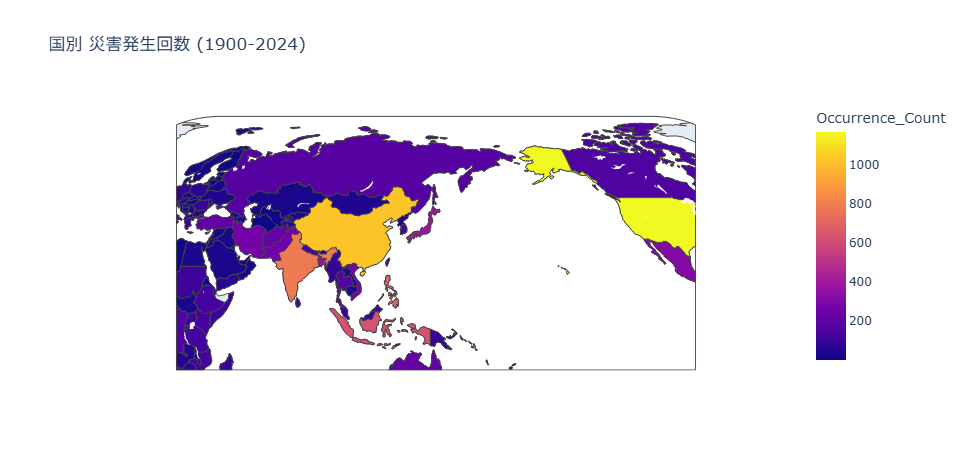

In [ ]:
from IPython.display import Image, display

display(Image("sample画像.png"))

↑　↑　これはサンプル画像です。本当は地図を動かすことができます。

発生頻度: アメリカ、日本、中国など、北半球の経済大国で多い（報告体制が整っている影響もあり）。

死者数: アフリカ、南アジア、ハイチなど、発展途上国で圧倒的に多い。

「災害がよく起きる場所」と「人が多く亡くなる場所」は一致しない。

・洞察：数字が示す「脆弱性」
回復力の差: 先進国はインフラが整っているため、回数は多くても死者は少ないです。逆に途上国は、ひとつの災害が致命的になる。

災害: 「頻度」を稼ぐのは嵐や洪水だが、「死者」を増やすのは突発的な地震や、長期的な干ばつが多い。

・結論：どこに注力すべきか
支援の転換: 単に災害が多い国ではなく、「致死率が高い（インフラが弱い）国」へ優先的に支援リソースを割くべきです。

対策: 先進国は「経済被害を防ぐインフラ投資」、途上国は「人命を守る早期警戒と食料支援」と、地域によって戦い方を変える必要があります。

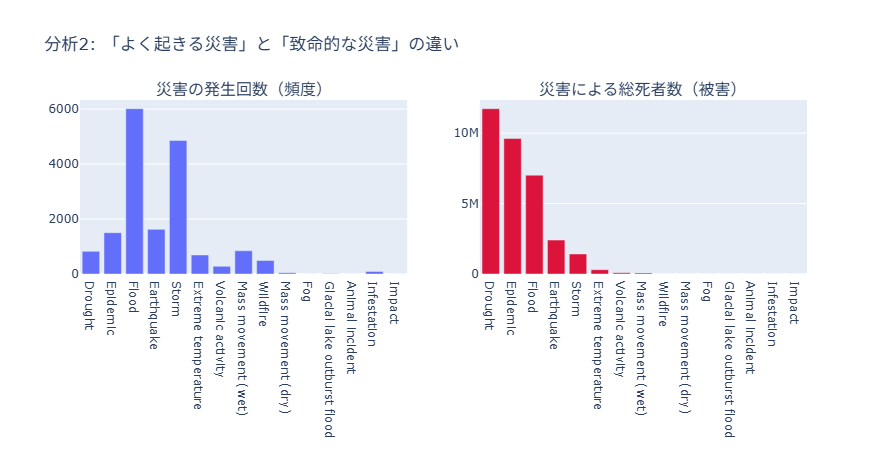

In [4]:
from IPython.display import Image, display

display(Image("sample3グラフ.png"))

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. データ読み込みと前処理
df = pd.read_csv('emdat.csv')
# 死者数の欠損値を0にして数値化
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)

# --- 分析1: 国別の「頻度 vs 被害」散布図 ---

# 国ごとに集計
country_stats = df.groupby(['Country', 'Region']).agg(
    Freq=('Disaster Type', 'count'),
    Deaths=('Total Deaths', 'sum')
).reset_index()

# ノイズを減らすため、発生回数が10回以上の国に絞る
filtered_stats = country_stats[country_stats['Freq'] >= 10]

fig1 = px.scatter(
    filtered_stats,
    x="Freq",
    y="Deaths",
    color="Region",             # 地域で色分け
    size="Deaths",              # バブルの大きさは死者数
    hover_name="Country",       # マウスオーバーで国名表示
    log_x=True,                 # 桁が違うため対数軸を使用
    log_y=True,
    title="分析1: レジリエンスの格差（右下＝災害に強い、左上＝脆弱）",
    labels={"Freq": "災害発生回数 (対数)", "Deaths": "総死者数 (対数)"}
)

# 基準線（平均的なライン）を追加して見やすくするオプション
# fig1.add_shape(type="line", x0=10, y0=100, x1=1000, y1=1000000, line=dict(color="Gray", dash="dot"))

fig1.show()

# --- 分析2: 災害タイプ別の「頻度 vs 死者」比較 ---

# タイプごとに集計
type_stats = df.groupby('Disaster Type').agg(
    Freq=('Disaster Type', 'count'),
    Deaths=('Total Deaths', 'sum')
).reset_index().sort_values('Deaths', ascending=False) # 死者数順にソート

# 2つのグラフを並べる（サブプロット）
fig2 = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("災害の発生回数（頻度）", "災害による総死者数（被害）")
)

# 左のグラフ：発生回数
fig2.add_trace(
    go.Bar(x=type_stats['Disaster Type'], y=type_stats['Freq'], name='発生回数'),
    row=1, col=1
)

# 右のグラフ：死者数（赤色で強調）
fig2.add_trace(
    go.Bar(x=type_stats['Disaster Type'], y=type_stats['Deaths'], name='総死者数', marker_color='crimson'),
    row=1, col=2
)

fig2.update_layout(
    title_text="分析2: 「よく起きる災害」と「致命的な災害」の違い",
    showlegend=False
)

fig2.show()